# Tutorial of Jackknife method

In [212]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [213]:
# There are two types of implementation, we check the results are the same for both implementations
def jackknife_A(series, nsp):
    cutsample = [samples for samples in zip(*[iter(series.tolist())] * nsp)]
    nb = len(cutsample)
    av_list = []

    for i in range(0, nb): 
        resample = []
        for j in range(0, nb):
            if j != i: resample += cutsample[i]
        av_list.append(np.mean(resample))

    jav = np.mean(av_list) # Check if the estimator is correct
    var = np.var(av_list, ddof=1)
    jerr = np.sqrt(var * (nb - 1))
    return jav, jerr

In [214]:
def jackknife_B(series, nsp): # Using pseudo values
    cutsample = [samples for samples in zip(*[iter(series.tolist())] * nsp)]
    nb = len(cutsample)
    av_sample = np.mean(series)
    psdv_list = []

    for i in range(0, nb): 
        resample = []
        for j in range(0, nb):
            if j != i: resample += cutsample[i]
        psdv = (nb * av_sample) - ((nb - 1) * np.mean(resample))
        psdv_list.append(psdv)

    jav = np.mean(psdv_list)
    jvar = np.var(psdv_list, ddof=1)
    jerr = np.sqrt(jvar / nb)
    return jav, jerr, psdv_list

In [215]:
# Generate samples from the Gaussian distribution
mu = 0
sigma = 1
size = 10000

normals = np.random.normal(mu , sigma, size)

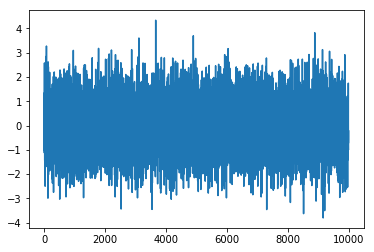

In [216]:
# Plot the data set
plt.plot(normals)

In [217]:
# Check the statistics
np.mean(normals)

-0.004311168763918953

In [218]:
np.sqrt(np.var(normals, ddof=1) / size)

0.009984148127925314

In [219]:
# Compare the results of the Jackknife method
avA_list = []
errA_list = []
avB_list = []
errB_list = []
block_size = int(size / 2)
#block_list = [5, 10, 25, 50, 100, 250, 500, 1000]  # For test calculation

for i in range(1, block_size + 1):
    avA, errA = jackknife_A(normals, i)
    avB, errB, _ = jackknife_B(normals, i)
    avA_list.append(avA)
    errA_list.append(errA)
    avB_list.append(avB)
    errB_list.append(errB)

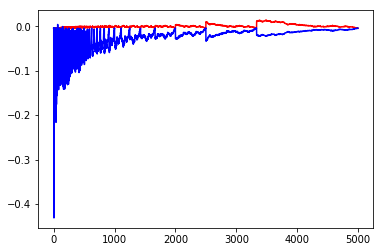

In [220]:
# Average
plt.plot(avA_list, color='Red')
plt.plot(avB_list, color='Blue')

(0, 100.0)

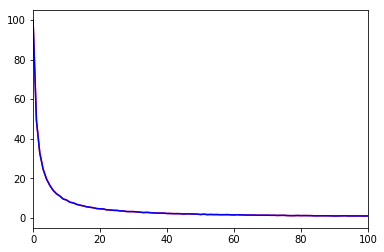

In [221]:
# Standard error
plt.plot(errA_list, color='Red')
plt.plot(errB_list, color='Blue')
plt.xlim(0, size / 100)

In [222]:
# Compare the results in the case of 1-delete Jackknife method
av, err = jackknife_A(normals, 1)
print(av, err)

-0.004311168763918949 99.83648908038109


In [223]:
av, err, psdv_list = jackknife_B(normals, 1)
print(av, err)

-0.004311168764089234 99.83149713112522


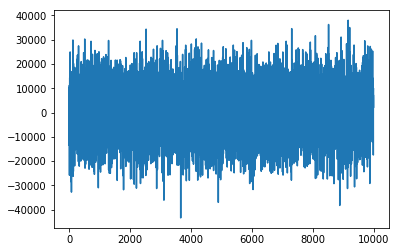

In [224]:
plt.plot(psdv_list)